In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [15]:
Etf=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/US%20Sector%20Inst%20ETF.csv?token=GHSAT0AAAAAABQMDWGY43WHCBJIO5TKEJQEYQO2UTQ')
Institutional=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/US%20Sector%20Institutional%20MF.csv?token=GHSAT0AAAAAABQMDWGZUQE7G3IZYJMAJB6QYQO2U4Q') 
Retail=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/US%20Sector%20Retail%20MF.csv?token=GHSAT0AAAAAABQMDWGZGS7TVXETRLVJ2LCWYQO2VEQ')
sp500=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/sp500index.csv?token=GHSAT0AAAAAABQMDWGZGMIGF5VZGTVUVR54YQO2WBA')

In [16]:
def get_rolling_average(table,window_length):
  result=pd.DataFrame(columns=table.columns)
  for i in table['AssetClass'].unique():
    Retailrolling=table[table['AssetClass']==i]
    Retailrolling['rollingaverage']=Retailrolling.rolling(window=window_length, center=False, on='AssetsEnd', axis=0, closed=None)['AssetsEnd'].mean()
    result=pd.concat([result,Retailrolling])
  return result

def get_label(table_orginal):

  def get_label_inner_function(change):
    if change>0.05:
      return 1
    elif change<-0.05:
      return -1
    else:
      return 0
  
  table=table_orginal
  table['change']=table['rollingaverage']/table['AssetsEnd']-1
  table['label']=table['change'].apply(get_label_inner_function)
  table_orginal['label']=table['label']
  return table_orginal

In [17]:
result=get_rolling_average(Retail,25)
result=get_label(result)

C:\Users\LinhTo\AppData\Local\Temp/ipykernel_18152/3792281932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retailrolling['rollingaverage']=Retailrolling.rolling(window=window_length, center=False, on='AssetsEnd', axis=0, closed=None)['AssetsEnd'].mean()
C:\Users\LinhTo\AppData\Local\Temp/ipykernel_18152/3792281932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retailrolling['rollingaverage']=Retailrolling.rolling(window=window_length, center=False, on='AssetsEnd', axis=0, closed=None)['AssetsEnd

In [18]:
result.head(30)

,ReportDate,AssetClass,Flow,FlowPct,AssetsEnd,PortfolioChangePct,rollingaverage,change,label
0,2/1/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,25.681524,8.0046,344.521230,-0.6207,NaN,NaN,0
20,1/25/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,9.273380,3.0423,320.831206,2.2149,NaN,NaN,0
40,1/18/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,0.974254,0.3198,304.806241,-0.2577,NaN,NaN,0
60,1/11/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,-5.155908,-1.6780,304.617006,0.8178,NaN,NaN,0
80,1/4/2017 12:00:00 AM,Commodities/Materials-North America-USA-North ...,-16.851581,-5.2997,307.259928,1.9309,NaN,NaN,0
100,12/28/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,-3.326958,-1.0383,317.971754,0.2768,NaN,NaN,0
120,12/21/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,0.843272,0.2636,320.411750,-0.0964,NaN,NaN,0
140,12/14/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,3.501891,1.0855,319.876922,-1.9230,NaN,NaN,0
160,12/7/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,28.262530,9.7727,322.578359,1.7696,NaN,NaN,0
180,11/30/2016 12:00:00 AM,Commodities/Materials-North America-USA-North ...,2.322618,0.8147,289.197942,0.6295,NaN,NaN,0


### MA25 for every sectors

<AxesSubplot:xlabel='ReportDate', ylabel='rollingaverage'>

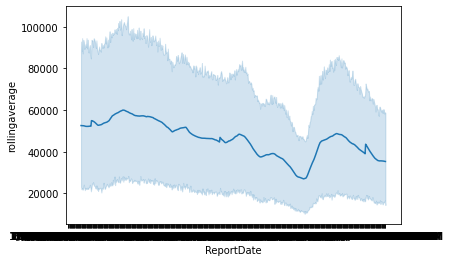

In [19]:
import seaborn as sns 

# may_flights = flights.query("month == 'May'")
sns.lineplot(data=result, x="ReportDate", y="rollingaverage")

## Logistic regression

In [20]:
result.dropna()

# Predictor X
X = result.drop(["ReportDate", 'AssetClass', 'rollingaverage','change', 'label'],  axis = 1)

# Response y
y = result['label']

In [21]:
# Split the test and train sets 
# Use a 20% split for test.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=888)

In [22]:
from sklearn.linear_model import LogisticRegression   # choose model class
model = LogisticRegression(solver='liblinear')       # instantiate model

# Fit model to the training data:
model.fit(Xtrain, ytrain)

# Predict the test set
y_model = model.predict(Xtest)

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(classification_report(ytest, y_model, labels=[1, 2, 3]))



              precision    recall  f1-score   support

           1       0.40      0.40      0.40       775
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.40      0.40      0.40       775
   macro avg       0.13      0.13      0.13       775
weighted avg       0.40      0.40      0.40       775



C:\Users\LinhTo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LinhTo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LinhTo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LinhTo\miniconda3\lib\site-packages\sklearn\metr

In [24]:
print(accuracy_score(ytest, y_model))

0.4475164011246485
